In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [18]:
df = pd.read_csv("noisy_curvefit_data.csv")
df.shape

(100, 6)

In [19]:
df.head()

,x,y_noise_1,y_noise_2,y_noise_3,y_noise_4,y_noise_5
0,-1.000000,11.624419,8.296963,12.201067,7.811725,3.155566
1,-0.929293,10.377466,9.674440,12.198084,8.275006,7.518855
2,-0.858586,10.585100,9.251983,13.186565,12.926586,9.963630
3,-0.787879,10.913928,7.786344,12.552304,11.832379,9.625801
4,-0.717172,8.640287,8.551869,4.741432,8.790834,6.624113


In [20]:
df.tail()

,x,y_noise_1,y_noise_2,y_noise_3,y_noise_4,y_noise_5
95,5.717172,-1.411918,0.822231,-2.027132,-1.825106,2.746147
96,5.787879,0.344879,-1.718956,2.747559,-6.803779,-5.137472
97,5.858586,0.307133,0.353528,0.967976,5.461567,-0.905616
98,5.929293,0.048657,0.159961,2.482130,-0.414616,-4.334548
99,6.000000,-0.193438,-2.244792,1.930035,4.992414,-6.872850


In [22]:
df.columns

Index(['x', 'y_noise_1', 'y_noise_2', 'y_noise_3', 'y_noise_4', 'y_noise_5'], dtype='object')

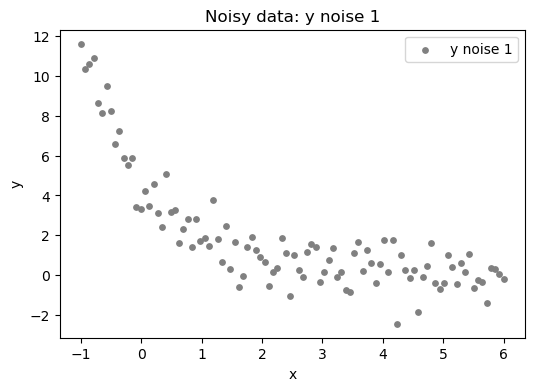

In [23]:
x = df["x"]
y_noise_1 = df["y_noise_1"]
plt.figure(figsize=(6,4))
plt.scatter(x, y_noise_1, s=15, color="grey", label="y noise 1")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Noisy data: y noise 1")
plt.legend()
plt.show()


In [24]:
def model(x, A, k):
    return A * np.exp(-k * x)


In [25]:
p0 = [1, 1]
popt, pcov = curve_fit(model, x, y_noise_1, p0=p0)
A_fit, k_fit = popt
print(f"Fit: y = {A_fit:.2f} * e^(-{k_fit:.2f} * x)")


Fit: y = 4.71 * e^(-0.92 * x)


In [38]:
residuals = y_noise_1 - model(x, A_fit, k_fit)
chi2 = np.sum(residuals**2)
dof = len(x) - len(popt)
chi2_reduced = chi2 / dof
print(chi2_reduced)
chi2_1 = chi2_reduced

0.7906732087457324


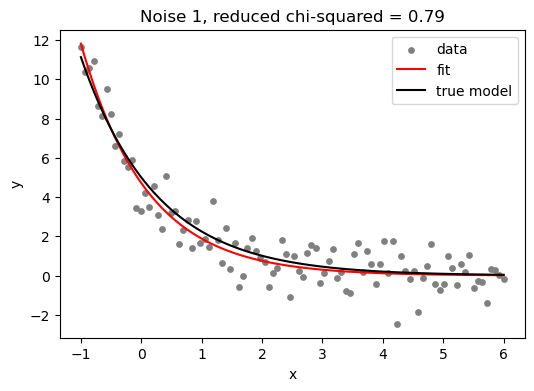

In [39]:
x_plot = np.linspace(x.min(), x.max(), 500)

plt.figure(figsize=(6,4))
plt.scatter(x, y_noise_1, s=15, color="grey", label="data")
plt.plot(x_plot, model(x_plot, A_fit, k_fit), color="red", label="fit")
plt.plot(x_plot, model(x_plot, 5, 0.8), color="black", label="true model")
plt.xlabel("x")
plt.ylabel("y")
plt.title(f"Noise 1, reduced chi-squared = {chi2_reduced:.2f}")
plt.legend()
plt.show()


In [40]:
def fit_model(x, y):
    p0 = [1, 1]
    popt, pcov = curve_fit(model, x, y, p0=p0)
    A_fit, k_fit = popt
    residuals = y - model(x, A_fit, k_fit)
    chi2 = np.sum(residuals**2)
    dof = len(x) - len(popt)
    chi2_reduced = chi2 / dof
    return A_fit, k_fit, chi2_reduced


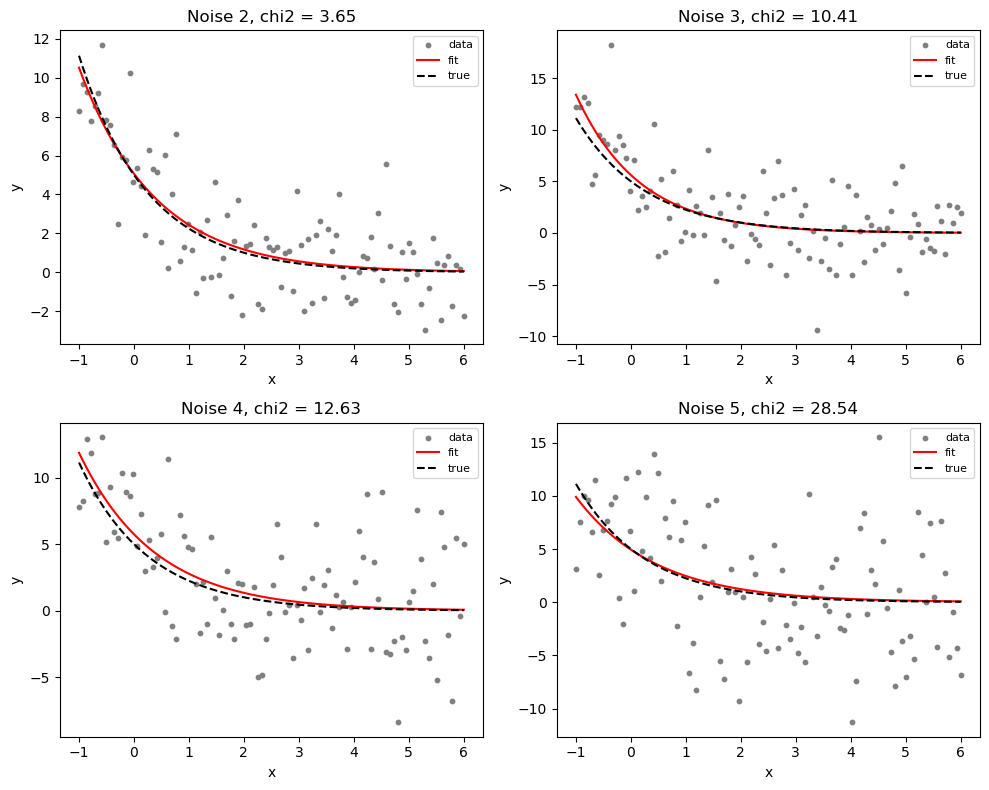

In [41]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

y2 = df["y_noise_2"]
A2, k2, chi2_2 = fit_model(x, y2)
axs[0, 0].scatter(x, y2, s=10, color="grey", label="data")
axs[0, 0].plot(x, model(x, A2, k2), color="red", label="fit")
axs[0, 0].plot(x, model(x, 5, 0.8), linestyle="--", color="black", label="true")
axs[0, 0].set_title(f"Noise 2, chi2 = {chi2_2:.2f}")
axs[0, 0].set_xlabel("x")
axs[0, 0].set_ylabel("y")
axs[0, 0].legend(fontsize=8)

y3 = df["y_noise_3"]
A3, k3, chi2_3 = fit_model(x, y3)
axs[0, 1].scatter(x, y3, s=10, color="grey", label="data")
axs[0, 1].plot(x, model(x, A3, k3), color="red", label="fit")
axs[0, 1].plot(x, model(x, 5, 0.8), linestyle="--", color="black", label="true")
axs[0, 1].set_title(f"Noise 3, chi2 = {chi2_3:.2f}")
axs[0, 1].set_xlabel("x")
axs[0, 1].set_ylabel("y")
axs[0, 1].legend(fontsize=8)

y4 = df["y_noise_4"]
A4, k4, chi2_4 = fit_model(x, y4)
axs[1, 0].scatter(x, y4, s=10, color="grey", label="data")
axs[1, 0].plot(x, model(x, A4, k4), color="red", label="fit")
axs[1, 0].plot(x, model(x, 5, 0.8), linestyle="--", color="black", label="true")
axs[1, 0].set_title(f"Noise 4, chi2 = {chi2_4:.2f}")
axs[1, 0].set_xlabel("x")
axs[1, 0].set_ylabel("y")
axs[1, 0].legend(fontsize=8)

y5 = df["y_noise_5"]
A5, k5, chi2_5 = fit_model(x, y5)
axs[1, 1].scatter(x, y5, s=10, color="grey", label="data")
axs[1, 1].plot(x, model(x, A5, k5), color="red", label="fit")
axs[1, 1].plot(x, model(x, 5, 0.8), linestyle="--", color="black", label="true")
axs[1, 1].set_title(f"Noise 5, chi2 = {chi2_5:.2f}")
axs[1, 1].set_xlabel("x")
axs[1, 1].set_ylabel("y")
axs[1, 1].legend(fontsize=8)

plt.tight_layout()
plt.show()


In [42]:
#As the noise level increases, the red fitted line moves farther away from the black true model line, and the two lines stop matching as closely.
#This happens because higher noise makes the data more scattered, so the fitting algorithm has trouble finding the true underlying exponential pattern.
#The red line has to bend to follow the noisy points, while the black line stays the true model

#The reduced chi-squared becomes larger as noise increases.
#This is because the residuals get bigger when the data is more noisy.
#Since chi squared is based on the sum of squared residuals, more noise makes chi squared increase.

In [43]:
params_df = pd.DataFrame({
    "noise_level": [1, 2, 3, 4, 5],
    "A_fit": [A_fit, A2, A3, A4, A5],
    "k_fit": [k_fit, k2, k3, k4, k5],
    "chi2_reduced": [chi2_1, chi2_2, chi2_3, chi2_4, chi2_5]
})

params_df


,noise_level,A_fit,k_fit,chi2_reduced
0,1,4.714814,0.918308,0.790673
1,2,5.063889,0.730396,3.649382
2,3,5.609396,0.870372,10.410207
3,4,5.738727,0.725965,12.626832
4,5,4.943458,0.695012,28.538124


In [44]:
df.to_csv("noisy_parameters.csv", index=False)